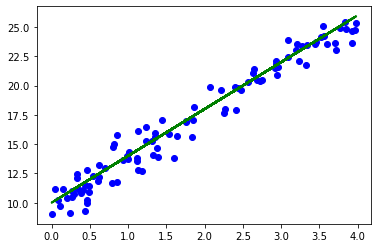

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from time import time

TOTAL = 100

X = 4 * np.random.rand(TOTAL, 1)
Y = 4 * X + 10 + np.random.randn(TOTAL, 1)
Y_real = 4 * X + 10

plt.plot(X, Y, 'bo')
plt.plot(X, Y_real, 'g', linewidth=2.0)
plt.show()


[[9.78774168]
 [3.96862821]]
Error sum: [26.87944473]


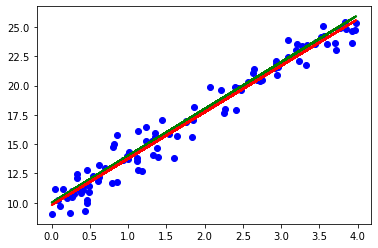

linear_regression in 0.122312 seconds


In [2]:
def linear_regression(x, y, y_real):
    A = np.c_[np.ones((TOTAL, 1)), x]

    theta = np.linalg.pinv(A).dot(y)
    print(theta)
    Y_prediction = A.dot(theta)

    error = np.abs(y_real - Y_prediction)
    print("Error sum:", sum(error))

    plt.plot(x, y, 'bo')
    plt.plot(x, y_real, 'g', linewidth=2.0)
    plt.plot(x, Y_prediction, 'r', linewidth=2.0)
    plt.show()

time_start = time()
linear_regression(X, Y, Y_real)
print("linear_regression in %f seconds" % (time() - time_start))

Error sum: [26.87944473]


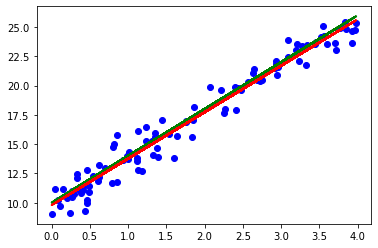

sk_linear_regression in 0.156549 seconds


In [3]:
def sk_linear_regression(x, y, y_real):
    lin_reg = LinearRegression()

    lin_reg.fit(x, y)
    error = np.abs(y_real - lin_reg.predict(x))
    print("Error sum:", sum(error))

    plt.plot(x, y, 'bo')
    plt.plot(x, y_real, 'g', linewidth=2.0)
    plt.plot(x, lin_reg.predict(x), 'r', linewidth=2.0)
    plt.show()
    
time_start = time()
sk_linear_regression(X, Y, Y_real)
print("sk_linear_regression in %f seconds" % (time() - time_start))

In [4]:
#######################################

[[9.78774168]
 [3.96862821]]
Error sum: [26.87944473]


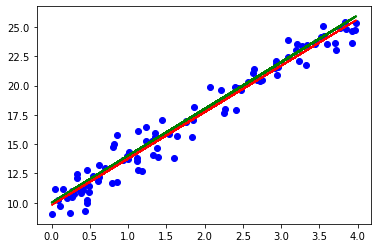

gradient_descent in 0.144313 seconds


In [5]:
STEP_SIZE = 0.1  # Скорость обучения
m = TOTAL  # Размер батча
m_1 = 1
m_2 = 0.05

def gradient_descent(x, y, y_real):    
    A = np.c_[np.ones((TOTAL, 1)), x]
    
    theta = np.random.rand(2, 1)
    if TOTAL <= 1000:
        iteration = 1000
    else:
        iteration = TOTAL
        
    for i in range(iteration):  # TOTAL = 100 при скорости обучения 0.1 не хватает
        gradients = 2 / m * A.T.dot(A.dot(theta) - y)
        theta -= STEP_SIZE * gradients
        
    print(theta)
    Y_prediction = A.dot(theta)
    
    error = np.abs(y_real - Y_prediction)
    print("Error sum:", sum(error))
    
#     plt.axis([-10, 60, 80, 120])
    plt.plot(x, y, 'bo')
    plt.plot(x, y_real, 'g', linewidth=2.0)
    plt.plot(x, Y_prediction, 'r')
    plt.show()


time_start = time()
gradient_descent(X, Y, Y_real)
print("gradient_descent in %f seconds" % (time() - time_start))

In [6]:
#######################################

[[9.84687832]
 [3.946774  ]]
Error sum: [24.90420149]


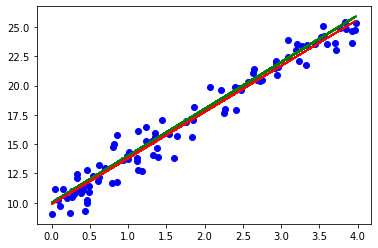

sgd in 0.231357 seconds


In [7]:
epochs = 100

def sgd(x, y, y_real):    
    A = np.c_[np.ones((TOTAL, 1)), x]
    
    theta = np.random.rand(2, 1)
    for epoch in range(epochs):
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            x_i = A[rand_ind:rand_ind+1]
            y_i = y[rand_ind:rand_ind+1]
            
            gradients = 2 / m * x_i.T.dot(x_i.dot(theta) - y_i) 
            theta -= STEP_SIZE * gradients
        
    print(theta)
    Y_prediction = A.dot(theta)
    
    error = np.abs(y_real - Y_prediction)
    print("Error sum:", sum(error))
    
    plt.plot(x, y, 'bo')
    plt.plot(x, y_real, 'g', linewidth=2.0)
    plt.plot(x, Y_prediction, 'r')
    plt.show()


time_start = time()
sgd(X, Y, Y_real)
print("sgd in %f seconds" % (time() - time_start))

Error sum: [19.24240317]


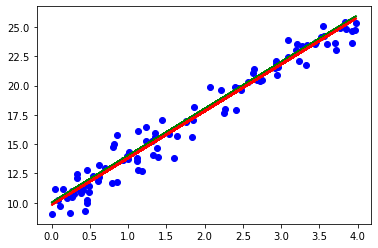

sk_sgd in 0.120348 seconds


In [10]:
def sk_sgd(x, y, y_real):    
    sgd_reg = SGDRegressor(max_iter=TOTAL, eta0=0.1)
    sgd_reg.fit(x, y.ravel())
    error = np.abs(y_real - sgd_reg.predict(x).reshape(-1, 1))
    print("Error sum:", sum(error))
    
    plt.plot(x, y, 'bo')
    plt.plot(x, y_real, 'g', linewidth=2.0)
    plt.plot(x, sgd_reg.predict(x), 'r', linewidth=2.0)
    plt.show()

time_start = time()
sk_sgd(X, Y, Y_real)
print("sk_sgd in %f seconds" % (time() - time_start))

In [11]:
# В sk_sgd так как значения подбираются рандомно, в нашем случае повезло